# Assignment 1: Small Image Dataset 

Implement a function that, given an input vector p whose elements are +1s and -1s, and a scalar value d (within 0.05 and 1) returns a perturbed/distorted version of the input vector, flipping (i.e., changing the sign) of the d*100 % its elements.

You can find an example of such a function, implemented in Python and MATLAB, in “distort_image” file (in the archive download at point 1). 

You can interpret the input p as an input image, and d as the percentage of distortion to apply.


In [1]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import pandas as pd
import json
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
import itertools
import random 
import glob

from hopfield import Hopfield

In [2]:
seed = 0
random.seed(seed)

In [3]:
patterns = [pd.read_csv(filename, header=None).to_numpy() 
            for filename in glob.iglob('./data/p*.csv')]
patterns = np.array(patterns).squeeze()
patterns.shape

(3, 1024)

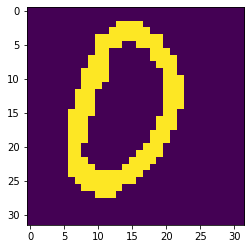

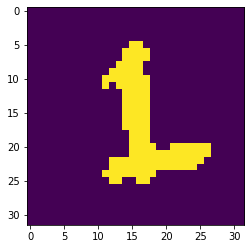

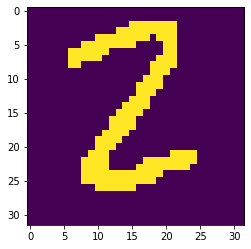

In [4]:
for p in patterns:
    plt.figure()
    p0 = p.reshape(32, 32)
    plt.imshow(p0.T, vmin=-1, vmax=1)

In [5]:
#through this unction we obtain a distorted version of the patterns
#those will be fed to the network as the x (neuron states)
def distort_image(im, prop):
    if prop < 0 or prop > 1:
        print('Out-of-bound proportion: going to default 0.05')
        prop = 0.05  # Default
    
    # Calculation of the number of elements to be distorted.
    total_elements = im.size
    num_to_distort = round(total_elements * prop)
    
    # Random selection of the indices of the elements to be distorted.
    indices_to_distort = np.random.permutation(total_elements)[:num_to_distort]
    
    # Flattening the image to facilitate access to and editing of elements.
    im_flat = im.flatten()
    im_flat[indices_to_distort] = -im_flat[indices_to_distort]
    
    # Return of the image to its original format after distortion.
    return im_flat.reshape(im.shape)

For each pattern p_i, generate 3 distorted versions, with percentage of distortion 0.05, 0.1 and 0.25

In [6]:
# distortion = [0.05, 0.1, 0.25]
# dist_img = [[distort_image(p, d), d] for p in patterns for d in distortion]
# # dist_img = [distort_image(p, d) for p in patterns for d in distortion]
# dist_img # 3 patterns x 3 distortion values

In [7]:
# for img in dist_img:
#     plt.figure()
#     img = img[0].reshape(32, 32)
#     plt.imshow(img.T, vmin=-1, vmax=1)

#### Bias grid search

In [8]:
bias_values=np.linspace(-1, 1, 21)

def grid_search(img, patterns, bias_values):
    best_bias = None
    best_energy = float('inf')
    results = {}
    
    for bias in bias_values:
        # print(f'Testing bias value: {bias}')
        model = Hopfield(img, patterns, bias)
        overlaps, energies, final_state = model()
        avg_energy = np.mean(energies)
        
        results[bias] = {
            'overlaps': overlaps,
            'energies': energies,
            'final_state': final_state
        }
        
        if avg_energy < best_energy:
            best_energy = avg_energy
            best_bias = bias
            
    # print(f'Best bias value: {best_bias} with average energy: {best_energy}')
    return best_bias, results

### Plots
- plot the energy as a function of time;
- plot the overlap computed for each one of the training patterns, as a function of time; (suggestion: use the same figure for plotting all the overlaps)
- plot the reconstructed image and compute a measure of discrepancy (choose the measure of discrepancy you prefer) between the reconstructed image and the optimal corresponding memory (add this result as title caption to the figure).

Note: plots of the energy and overlap functions should be produced considering the evolution of the state of the network per each state update (i.e., the resolution is on the neuron update, not on the epochs)

In [9]:
                ###################################     to be finished      #################################################

def hf_plot(states, energies, overlaps, title):
    plt.figure(figsize=(20, 15))
    plt.suptitle(title)
    
    #1st PLOT: energy function
    ax = plt.subplot(3, 2, 1)
    ax.set_title('Energy as a time function')
    ax.plot([e for e in energies])
    ax.set_xlabel('Time')
    ax.set_ylabel('Energy')
    ax.grid(True)
    
    #2nd PLOT: overlaps
    ax = plt.subplot(3, 2, 2)
    ax.set_title('Overlap as a time function')
    for p in range(len(patterns)):
        ax.plot([o[p] for o in overlaps], label=f'pattern {p}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Overlap')
    ax.grid(True)
    ax.legend()
    
    #3rd PLOT: reconstruction and discrepancy value
    # ax = plt.subplot(3, 2, 3)
    

In [10]:
def energy_plot(states, energies):
    plt.figure(figsize=(10, 5))
    plt.title('Energy as a time function')
    plt.plot([e for e in energies])
    plt.xlabel('Time')
    plt.ylabel('Energy')
    plt.grid(True)
    # if filename is not None:
    #     plt.savefig(filename)
    plt.show()
    
def overlap_plot(states, overlaps):
    plt.figure(figsize=(10, 5))
    plt.title('Overlap as a time function')
    for p in range(len(patterns)):
        plt.plot([o[p] for o in overlaps], label=f'pattern {p}')
    plt.xlabel('Time')
    plt.ylabel('Overlap')
    plt.grid(True)
    plt.legend()
    # if filename is not None:
    #     plt.savefig(filename)
    plt.show()
    
# def reconstruction_plot():
    


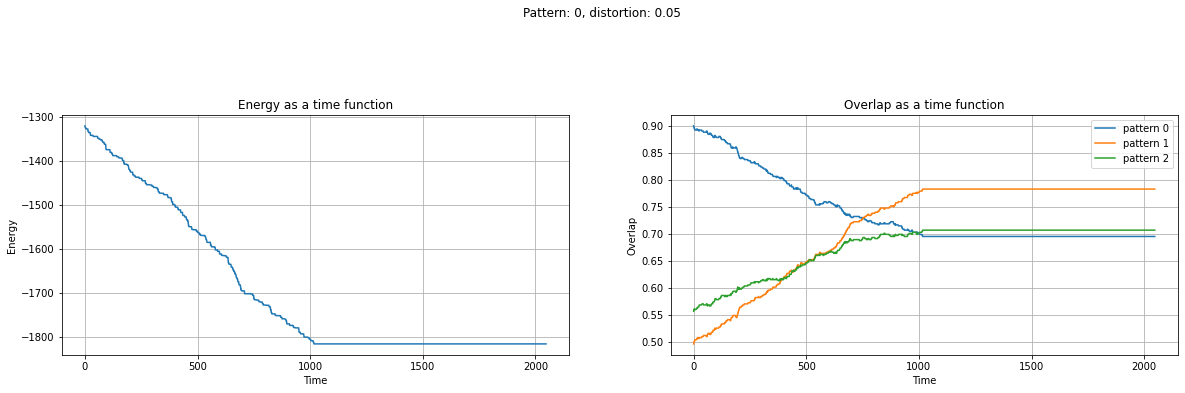

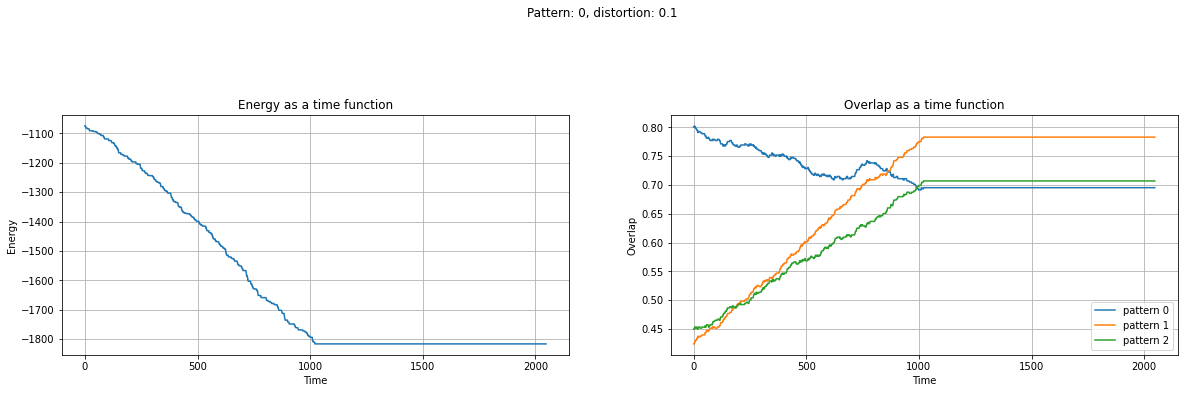

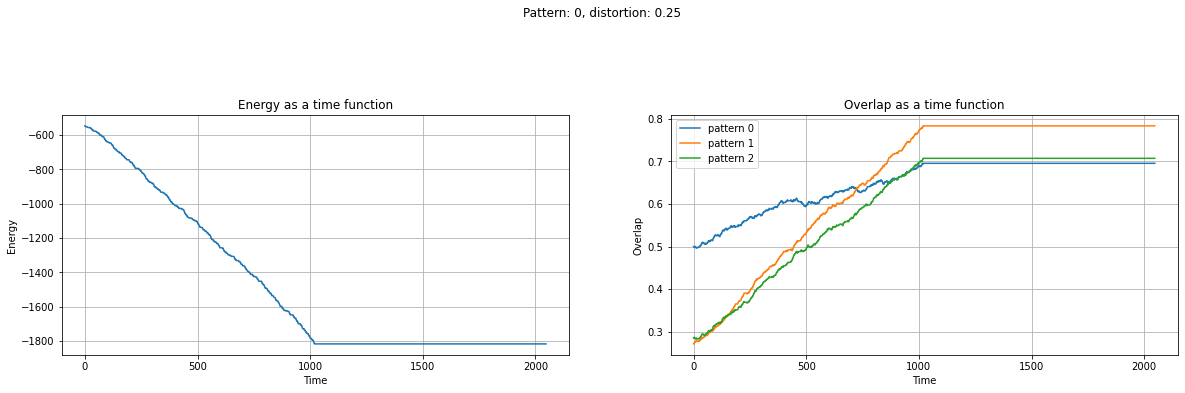

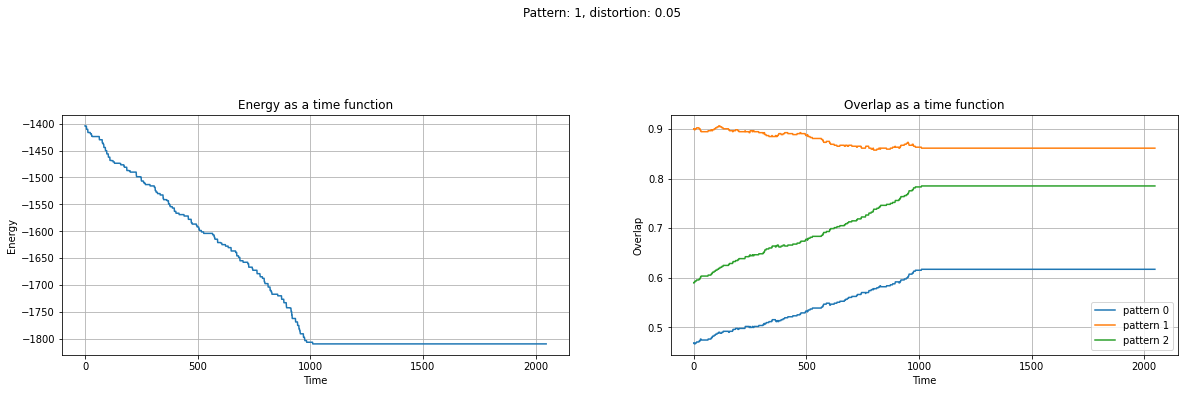

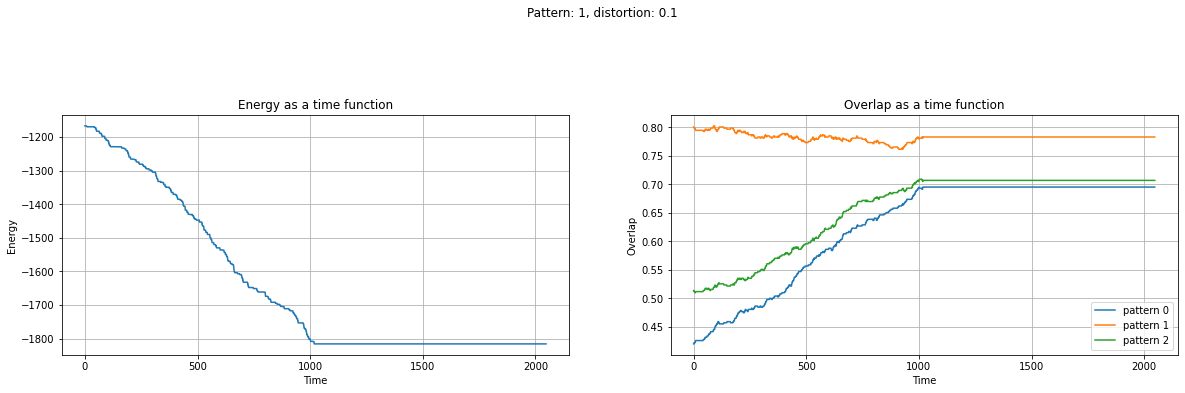

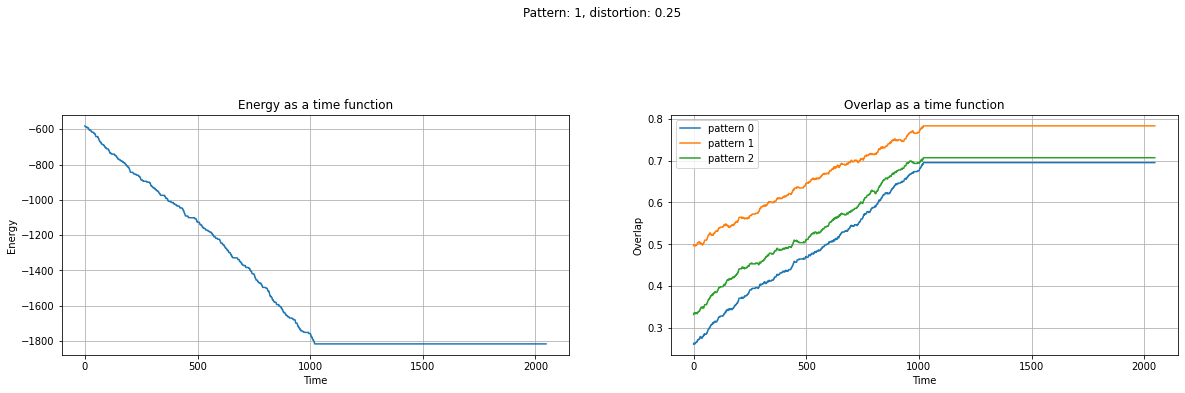

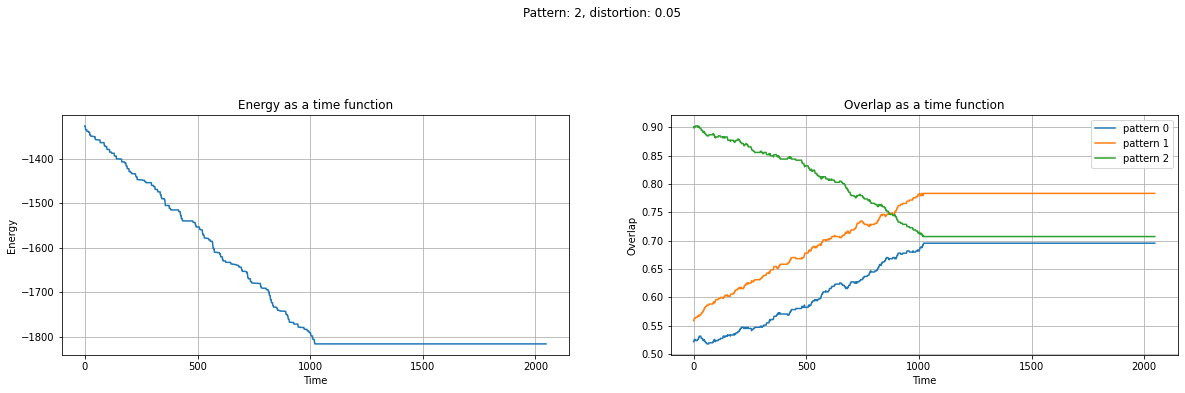

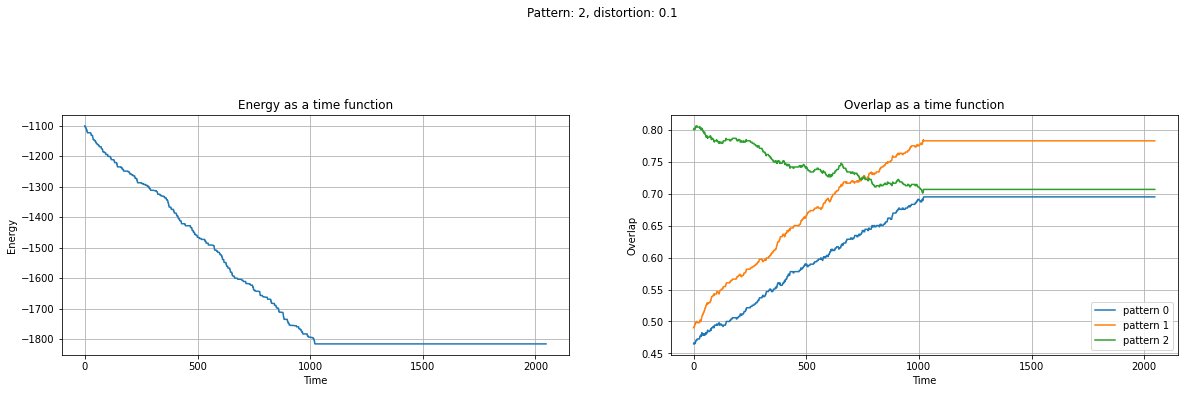

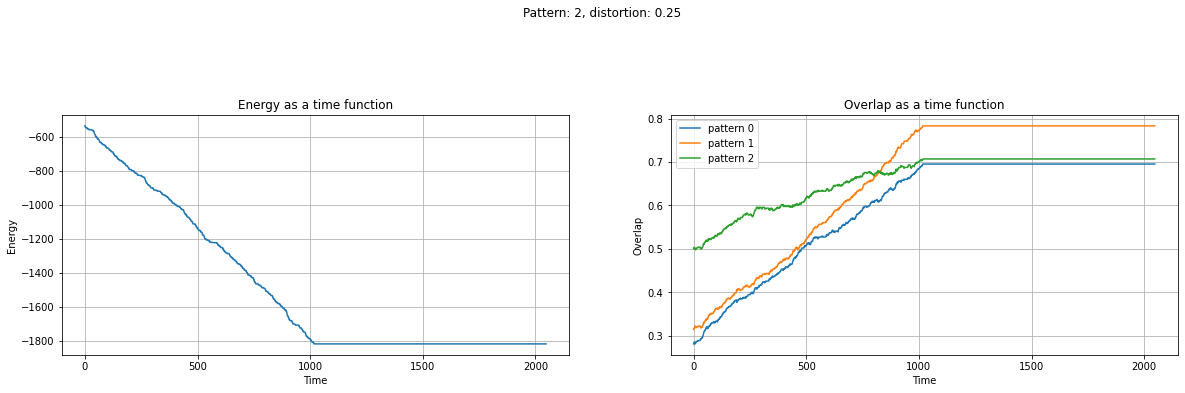

In [11]:
distortion = [0.05, 0.1, 0.25]
pindex=0
# print(f'patterns: {len(patterns)}')
for p in patterns:
    # p_history={}
    for d in distortion:
        # print(f'Pattern: {pindex}, distortion: {d}')
        
        img=distort_image(p, d)
        # pltimg=img.reshape(32, 32).T
        # plt.figure()
        # plt.imshow(pltimg, vmin=-1, vmax=1)
        
        best_bias, results = grid_search(img, patterns, bias_values)
        
        hf = Hopfield(img, patterns, best_bias)
        overlaps, energies, states = hf()
        hf_plot(states, energies, overlaps, f'Pattern: {pindex}, distortion: {d}')

        # reconstruction_plot()   ### TO DO
    pindex+=1
        
        
        


In [12]:
# # #THIS IS A TEST BUT IS WRONG: YOU SUBSCRIBE EVERY EPOCH'S RESULTS EACH TIME. 
# # #FIGURE OUT A SOLUTION TO SAVE THEM ALL EACH TIME IN A DIFFERENT DS OR APPEND THEM IN AN ITERABLE
# # #
# for img in dist_img:
#     print(img[1])
#     hf = Hopfield(img[0], patterns)
#     overlaps, energies, states = hf()
#     print(overlaps, energies, states)
# #     # multiplot(states, overlaps, energies, 'Distortion level: {0}'.format(img[1]))
# #     #here insert print for each set of states
    